Import modules and set the datetime

In [89]:
import spiceypy
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load kernels using the kernel_meta.txt file
spiceypy.furnsh("kernel_meta.txt")

# Create an initial datetime object
datetime_utc = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S")

# Convert datetime to ET using SPICE function utc2et
datetime_et = spiceypy.utc2et(datetime_utc)

In [90]:
# Create an empty dataframe
solar_system_df = pd.DataFrame()

solar_system_df.loc[:, "ET"] = [datetime_et]
solar_system_df.loc[:, "UTC"] = [datetime_utc]

solar_system_dict = {"SUN": 10, "VENUS": 299, "MOON": 301, "MARS": 4}

In [91]:
for body_name in solar_system_dict:
    solar_system_df.loc[:, f"dir_{body_name}_wrt_earth_ecl"] = solar_system_df[
        "ET"
    ].apply(
        lambda x: spiceypy.spkezp(
            targ=solar_system_dict[body_name],
            et=x,
            ref="ECLIPJ2000",
            abcorr="LT+S",
            obs=399,
        )[0]
    )

    solar_system_df.loc[:, f"{body_name}_long_rad_ecl"] = solar_system_df[
        f"dir_{body_name}_wrt_earth_ecl"
    ].apply(lambda x: spiceypy.recrad(x)[1])
    solar_system_df.loc[:, f"{body_name}_lat_rad_ecl"] = solar_system_df[
        f"dir_{body_name}_wrt_earth_ecl"
    ].apply(lambda x: spiceypy.recrad(x)[2])

Text(0, 0.5, 'Lat. in degrees')

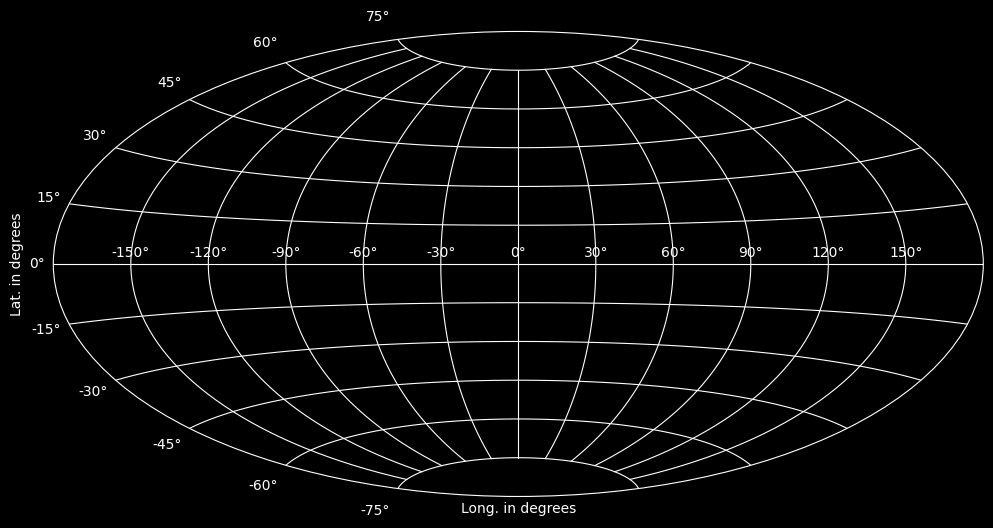

In [92]:
plt.style.use("dark_background")

plt.figure(figsize=(12, 8))

plt.subplot(projection="aitoff")
plt.grid(True)

plt.xlabel("Long. in degrees")
plt.ylabel("Lat. in degrees")

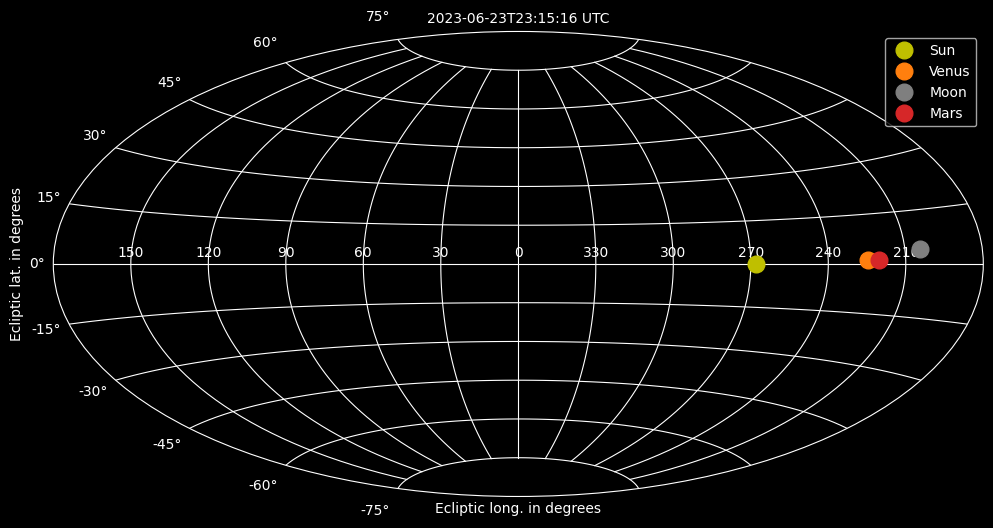

In [94]:
plt.style.use("dark_background")

plt.figure(figsize=(12, 8))

plt.subplot(projection="aitoff")
plt.grid(True)

plt.title(f"{datetime_utc} UTC", fontsize=10)

BODY_COLOR_ARRAY = ["y", "tab:orange", "tab:gray", "tab:red"]

for body_name, body_color in zip(solar_system_dict, BODY_COLOR_ARRAY):
    plt.plot(
        solar_system_df[f"{body_name}_long_rad_ecl"],
        solar_system_df[f"{body_name}_lat_rad_ecl"],
        color=body_color,
        marker="o",
        linestyle="None",
        markersize=12,
        label=body_name.capitalize(),
    )

plt.xlabel("Ecliptic long. in degrees")
plt.ylabel("Ecliptic lat. in degrees")

plt.legend()